


\##  <span style="color:blue">Exercise 2 - Driver file </span>
## <span style="color:blue">Computer Vision - Fall 2020


**Lecturer:** Prof. Yael Moses, IDC

**TA:** Eyal Friedman, IDC

**Sybmission date: 19.12.2020**



In this excercise you will practice working with geometric tools for analyzing 3D scenes from 2D images.

## Submission guidelines:

1. Your zip file should include the following files only:
    - ex2-driver.ipynb  **Or**  ex2-driver.py 
    - ex2_ID_ID.doc  **Or**  ex2_ID_ID.pdf
2. The results you are asked to display and the open questions should be answered in a doc/pdf file. 
   (Don't add the python code to that file.)
4. You may use any IDE  (e.g., Spyder, Jupyter Notebook, Pycharm, ect.).
5. Name the file 'ex2_ID_ID.zip' and do **not** include any additional directories. 
6. Submit using *moodle*
7. Submit on time!
8. You can submit this assignment in pairs (no triples).

## Read the following instructions carefully:
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests, unless requested.
3. Use `python 3` and `numpy 1.18.5`. Changes of the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden, unless been provided by us.
4. Your code must run without errors. Note,  **code that fails to  run will not be graded.**
5. Document your code properly.

## Honor Code:
The assignment is a basic tool for learning the material. You can probably find the solution on the Web. However, if  you do so, then you will not learn what you should learn from it. In addition, since we  grade  the assignment, using existing solutions will be considered dishonest.
In particular, you are not allowed to copy or use any code that solves the task. 
You are more than welcome to talk with your friends, but you are not allowed to give your code or answers and you are not allowed to use their code or answers. 
Remember – you take this course in order to learn.


In [1]:
import cv2
# This opens an inteactive figure - use it in part B
import matplotlib
#matplotlib.use('TkAgg')
import warnings
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import null_space
np.set_printoptions(suppress=True) # suppresses the use of scientific notation for small numbers
# This specifies the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
warnings.filterwarnings("ignore")

In [4]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)
print("cv version: ", cv2.__version__)

Python version:  3.8.3
Numpy version:  1.18.5
cv version:  4.4.0


## Section A: Projection

**In this part you will go over projection matrix,  and use them to project 3D points to an image.**



Fill the missing values, given partial values of the parameters of the left and right cameras.

\
**Right image parameters:**

The projection matrix of the right image:

In [3]:
MR = np.array([[1100.504780,          0,   331.023000,   0],
               [0,          1097.763735,   259.386377,   0],
               [0,                    0,            1,   0]])
print(MR)

[[1100.50478     0.        331.023       0.      ]
 [   0.       1097.763735  259.386377    0.      ]
 [   0.          0.          1.          0.      ]]


The rotation matrix of the right image:

In [4]:
RR = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])
#note that M  = MintR @ RR[RR | [0,0,0,1].T] and we are given M & RR
# So in order to get MintR we need to: M @ RR[RR | [0,0,0,1].T] ^-1 = MintR 
# BUT RR[RR | [0,0,0,1].T] ^-1 == RR[RR | [0,0,0,1].T] ^-1 rotation is Identity matrix
# In conclusion: M = MintR[I | 0]

The focal length of the right image:

In [5]:
fR = 1.0

From here on, replace "none" with your answers to the questions. In addition, if there are more than a single possible solution, choose one.
Compute the right image center (principal point):


In [6]:
OxR = MR[0,2]
OyR = MR[1,2]

print(OxR,OyR)


331.023 259.386377


Compute the right image scale factor which is consistent with MR:

In [7]:
SxR = MR[0,0]
SyR = MR[1,1]
print(SxR ,SyR )

1100.50478 1097.763735


Compute the right image intrinsic matrix which is consistent with MR:

In [8]:
MintR = MR[:3,:3]
MintR

array([[1100.50478 ,    0.      ,  331.023   ],
       [   0.      , 1097.763735,  259.386377],
       [   0.      ,    0.      ,    1.      ]])

 
**Left image parameters**
 
Left image center (principal point):

In [9]:
OxL = 320.798101 
OyL = 236.431326

Scale factor:

In [10]:
SxL = 1095.671499
SyL = 1094.559584 

Focal length of the left image: 

In [11]:
fL = 1

Translation vector w.r.t. the world origin:

In [12]:
TL = -np.array([[178.2218,18.8171,-13.7744]]).T
TL

array([[-178.2218],
       [ -18.8171],
       [  13.7744]])

In [13]:
MTL= np.identity(4)
MTL[0:3,3]=-TL.T
MTL

array([[  1.    ,   0.    ,   0.    , 178.2218],
       [  0.    ,   1.    ,   0.    ,  18.8171],
       [  0.    ,   0.    ,   1.    , -13.7744],
       [  0.    ,   0.    ,   0.    ,   1.    ]])

Rotation matrix of the left image:

In [14]:
RL = np.array([[ 0.9891,    0.0602,   -0.1346],
               [-0.0590,    0.9982,    0.0134],
               [0.1351,   -0.0053,    0.9908]])
RL

array([[ 0.9891,  0.0602, -0.1346],
       [-0.059 ,  0.9982,  0.0134],
       [ 0.1351, -0.0053,  0.9908]])

In [15]:
M_RL = np.identity(4)
M_RL[0:3,0:3]=RL
M_RL

array([[ 0.9891,  0.0602, -0.1346,  0.    ],
       [-0.059 ,  0.9982,  0.0134,  0.    ],
       [ 0.1351, -0.0053,  0.9908,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

Compute the intrinsic projection matrix of the left camera: 

In [16]:
MintL = MR.copy()
MintL[0,0]= SxL*fL
MintL[1,1]= SyL*fL
MintL[0,2]= OxL
MintL[1,2]= OyL
MintL

array([[1095.671499,    0.      ,  320.798101,    0.      ],
       [   0.      , 1094.559584,  236.431326,    0.      ],
       [   0.      ,    0.      ,    1.      ,    0.      ]])

Compute the projection matrix of the left camera

In [17]:
ML = MintL@M_RL@MTL
print(ML)

[[  1127.06850311     64.2591943     170.36937471 199730.61311706]
 [   -32.63714331   1091.33629072    248.92325623  11290.36518739]
 [     0.1351         -0.0053          0.9908         10.33035903]]


Compute the COP of the left and the right images, in Cartesian coordinates:   

(You may use the the function *null_space* from *scipy.linalg*) 

In [18]:
from scipy.linalg import null_space
cl_proj = null_space(ML)
cr_proj = null_space(MR)
#now i need to project the COP to the cartesian coordinates from the projective coordinates

In [19]:
CL = (cl_proj/cl_proj[3])[0:3]
CR = (cr_proj/cr_proj[3])[0:3]
print("CL is\n",CL,"\n","CR is\n",CR)

CL is
 [[-178.2218]
 [ -18.8171]
 [  13.7744]] 
 CR is
 [[0.]
 [0.]
 [0.]]


Compute the distance between CL and CR:
    

In [20]:
D = np.linalg.norm(CL - CR)
print(D)

179.74100072885088


## Part A2: Hands on Triangulation 

Write a function p = proj(M,P) that recieves as input the 3D point P and a projection matrix M, and outputs the 2D coordinates of the projected point.


In [21]:
# Your code for proj function
def proj(M,P,proj = False):
    P_hom = np.concatenate((P, np.array([[1]])))
    p_tild = M @ P_hom
    if proj == True:
        return p_tild
    p_cartes = (p_tild / p_tild[2])[0:2]  
    return p_cartes


In [22]:
a = np.array([[-140],[50],[1200]])
b = np.array([[1]])
np.concatenate((a, np.array([[1]]))).T

array([[-140,   50, 1200,    1]])

1.	Given object points in the world coordinate system,  P=(-140,50,1200) and Q=(30,100,2000).

    a.	What are the coordinates (Cartesian) of the points in the left camera coordinate system?\
    b.	What are the coordinates (Cartesian) of the points in the right camera coordinate system?
   

In [23]:
PL = RL @ (np.array([[-140],[50],[1200]]) - TL)
PR = np.array([[-140],[50],[1200]]) # The rotation of the right image is one , and no translation so no need to translate and rotate
QL = RL @ (np.array([[30],[100],[2000]]) - TL)
QR = np.array([[30],[100],[2000]]) # The rotation of the right image is one , and no translation so no need to translate and rotate
print("PL is \n{0}\n************\nPR is \n{1}\n************\nQL is \n{2}\n************\nQR is \n{3}\n************\n".format(PL,PR,QL,QR))

PL is 
[[-117.71799396]
 [  82.33356606]
 [1180.11135903]]
************
PR is 
[[-140]
 [  50]
 [1200]]
************
QL is 
[[ -54.24099396]
 [ 132.93356606]
 [1995.45335903]]
************
QR is 
[[  30]
 [ 100]
 [2000]]
************



In [24]:
P = np.array([[-140],[50],[1200]])
pL = proj(ML,P)
pR = proj(MR,P)

Q = np.array([[30],[100],[2000]]) 
qL = proj(ML,Q)
qR = proj(MR,Q)


In [25]:
print("pL is \n{0}\n************\npR is \n{1}\n************\nqL is \n{2}\n************\nqR is \n{3}\n************\n".format(pL,pR,qL,qR))

pL is 
[[211.50311802]
 [312.79614795]]
************
pR is 
[[202.63077567]
 [305.12653262]]
************
qL is 
[[291.01523943]
 [309.3489455 ]]
************
qR is 
[[347.5305717 ]
 [314.27456375]]
************



### Read two images and display the projections of P and Q on the two given images ###

[//]: # " "
The code below should return this result: 

![Example](PandQprojections1.png "Example")

(<matplotlib.image.AxesImage at 0x229f2f557c0>,
 Text(0.5, 1.0, 'Right image'),
 <matplotlib.collections.PathCollection at 0x229f2fa1a00>)

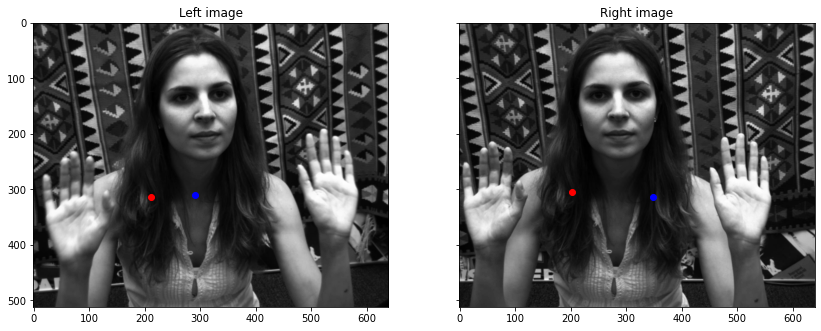

In [26]:
imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image'), ax1.scatter(pL[0], pL[1], color='r'), \
    ax1.scatter(qL[0],qL[1], color = 'b')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image'), ax2.scatter(pR[0], pR[1], color = 'r'), \
    ax2.scatter(qR[0],qR[1], color = 'b') 

**Answer Question:**\
Look at the projection of each of the points in the two images. One pair looks as expected, and the other doe not. Please give a short explanation of what may have caused it.

**Your answer:** at the PDF


## Part B: Epipolar Geometry
Compute the fundamental matrix F and the epipoles eL and eR of the left and right images, using their projection matrices.
Note, you should normalize F by F(3,3) for improved precision.

For the epipoles' computation use the MR and ML and the Center of projections.

**Answer Quesion:**
Can you double check if they are correct using F? If so, check it.


In [27]:
eL = proj(ML,CR,True)
eR = proj(MR,CL,True)
ex = np.zeros((3,3))
ex[0,1]= -eR[2]
ex[1,0]= eR[2]
ex[0,2]= eR[1]
ex[2,0]= -eR[1]
ex[1,2]= -eR[0]
ex[2,1]= eR[0]
F = ex @ MR @ (np.linalg.pinv(ML))
F = F / F[2,2]
F

array([[ 0.00000075, -0.0000062 , -0.00777248],
       [-0.00000459,  0.0000007 ,  0.08796507],
       [ 0.00477065, -0.08530944,  1.        ]])

In [28]:
# double chec if PL and PR are corresponding points then eR@F = 0  and el@F=0+epsilon whereas 0 is the 0 vector [0,0,0]
print(eR.T@F)
print(F@eL)

[[-0. -0.  0.]]
[[-0.]
 [ 0.]
 [-0.]]


## Epipolar lines ##

Click on three different points of the **right** image, and check if the epipolar lines on the left image pass through a pixel that corresponds to the one you picked in the right image. Output the set of epipolar lines overlayed on the pair of  images as shown below.

To do so you can use:
1. The code below opens the images in a seperate window. You can click on the right image and  capture the click's coordinates by using the function *plt.ginput*.
2. Take each point (this can be done by a loop) and calculate its epipolar line  on the left image using F.
3. Compute the two endpoints of the line in the image to plot it on the left image. \
    **Hint**: you have linear coefficients - (a,b,c). Calculate the y value in the image for x=0, and x=image.width and plot the result.\
    Use: ax2.plot((x0. xWidth),(yx0, yxWidth))
4. Use the set of the points of the right image that you collected, and draw the epipolar lines on the right image.

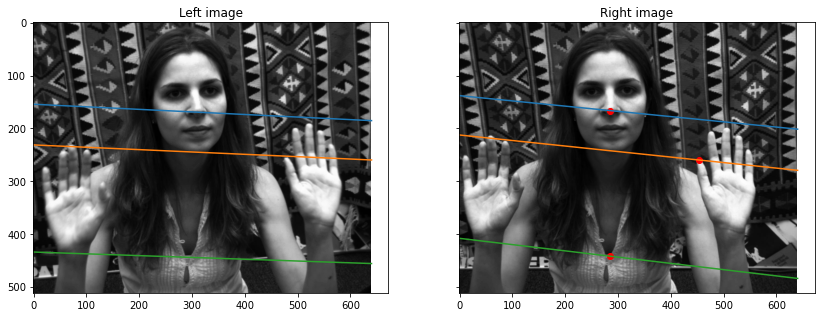

In [29]:
# This sould open a new figure window outside of jupyter notebook
%matplotlib qt  

imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)
    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')

data = plt.ginput(3)

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

ax2.scatter(x_val, y_val, color='r')

for x in data: 
    # Write your own implementation here.
    left_line = np.array([[x[0]],[x[1]],[1]]).T @ F
    y = lambda x: -left_line[0,0]*x/left_line[0,1]-left_line[0,2]/left_line[0,1]
    ax1.plot((0, imL.shape[1]),(y(0), y(imL.shape[1])))
    line_right = F @ ML @ (np.linalg.pinv(MR)) @ np.array([[x[0]],[x[1]],[1]])
    line_right = line_right.T
    y_r = lambda x: -line_right[0,0]*x/line_right[0,1]-line_right[0,2]/line_right[0,1]
    ax2.plot((0, imR.shape[1]),(y_r(0), y_r(imR.shape[1])))

In [30]:
%matplotlib inline

### This is what you should see:
![Epipolar](epipolarLines1.png "Epipolar Lines example")

## Part C : SIFT and RANSAC/LMedS
**Follow the matching to compute F.**

https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html 

The example attached here needs some twicks to make it work. First you need to uninstall the opencv package and to install to opencv-contrib package:
- pip uninstall opencv-python 

Then install the contrib version with this:
- pip install opencv-contrib-python

**<span style="color:red"> Now, you have to use those lines:**
- **sift = cv2.xfeatures2d.SIFT_create()**
- **kp1, des1 = sift.detectAndCompute(img1, None)**


Hereby, we will find the corresponding featues using the SIFT algorithm and match the closet points. The plotted figure showes the best 300 matches.


(<matplotlib.image.AxesImage at 0x229f756c1f0>, Text(0.5, 1.0, 'Matches'))

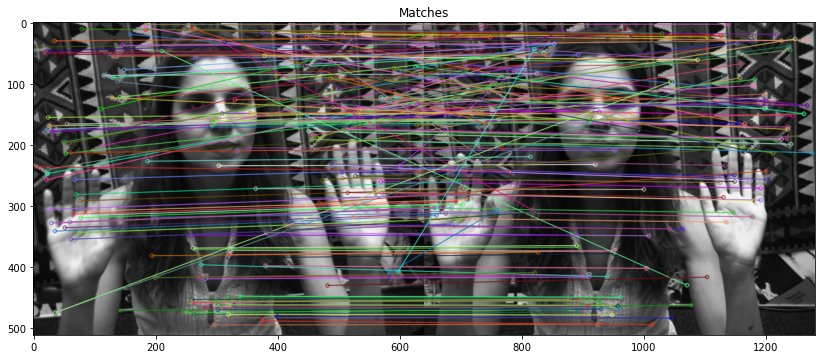

In [31]:
imL = cv2.imread('Left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('Right.tif', cv2.IMREAD_GRAYSCALE)

# Initiate SIFT detector
# In the link above you need to change the next line from cv.SIFT to cv2.xfeatures2d.
# Instead of: sift = cv2.SIFT() use:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
matching = []
# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        matching.append(m)
        

# Sort them in the order of their distance.
matching = sorted(matching, key = lambda x:x.distance)
        
# Draw first 300 matches.
img3 = np.array([])
img3 = cv2.drawMatches(imL, kp1, imR, kp2, matching[-200:], outImg = img3, flags =2)

plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row')
ax1.imshow(img3, cmap='gray'), ax1.set_title('Matches')     

Not for submission: Look at the obtain results.

    a. Do you think all matches are correct?
    b. In which regions of the scene, most of the reliable matches were found?
    c. Try the worst 200 mathces as well -- matching[-200:] (repaired by us from [-1-200:] to [-200:] )

Now, we will use the found matches to compute **F** using *cv2.findFundamentalMat()*.

In [32]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# Computing the F matrix
F_calc, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [33]:
print(F_calc.T)
print(F)

[[ 0.00000061 -0.00000253  0.00418121]
 [-0.00000788  0.00000129 -0.08196367]
 [-0.00692838  0.08385216  1.        ]]
[[ 0.00000075 -0.0000062  -0.00777248]
 [-0.00000459  0.0000007   0.08796507]
 [ 0.00477065 -0.08530944  1.        ]]


And now lets check the computed F_calc:
1. Use it to draw the epipolar line as in the example above (change F to F_calc.T)
2. Compute the distance between the computed epipoles by F and by F_calc.

In [34]:
from scipy.linalg import null_space
e1=null_space(F_calc)
e2=null_space(F)

e1_c = e1[0:2,0]/e1[2,0]
e2_c = e2[0:2,0]/e2[2,0]

print(np.linalg.norm(e1_c-e2_c))

14740.48133624584


### Your part in this section :) ###

#### Take two images by your camera and compute the epipolar geometry using LMedS ####

Please submit at the pdf file your results of the cosine distance and the output of your images.

In [35]:
imL_self = cv2.imread('lefttt.tif', cv2.IMREAD_GRAYSCALE)
imR_self = cv2.imread('righttt.tif', cv2.IMREAD_GRAYSCALE)

# Initiate SIFT detector
# In the link above you need to change the next line from cv.SIFT to cv2.xfeatures2d.
# Instead of: sift = cv2.SIFT() use:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(imL_self,None)
kp2, des2 = sift.detectAndCompute(imR_self,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
# create FlannBasedMatcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)

# Match descriptors.
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
matching = []
# Building a list of points screened by ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        matching.append(m)
        

# # Sort them in the order of their distance.
# matching = sorted(matching, key = lambda x:x.distance)
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# Computing the F matrix
F_self, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

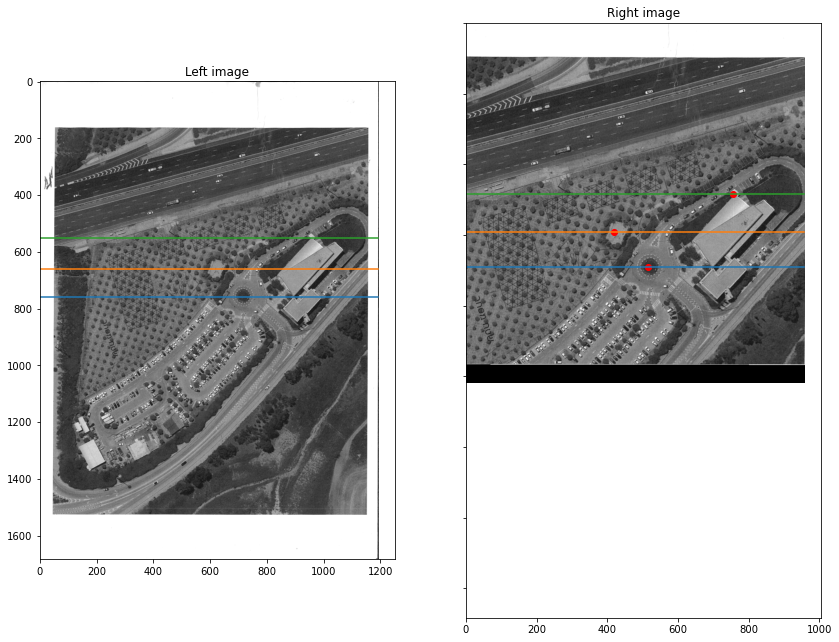

In [36]:
# This sould open a new figure window outside of jupyter notebook
%matplotlib qt  

    
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2,sharex='col', sharey='row')

ax1.imshow(imL_self, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR_self, cmap='gray'), ax2.set_title('Right image')

data = plt.ginput(3)

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

ax2.scatter(x_val, y_val, color='r')
a = 0
for x in data: 
    # Write your own implementation here.
    left_line = np.array([[x[0]],[x[1]],[1]]).T @ F_self #give me the left line using p~_r @ Fundamental matrix
    y = lambda x: -left_line[0,0]*x/left_line[0,1]-left_line[0,2]/left_line[0,1]
    ax1.plot((0, imL_self.shape[1]),(y(0), y(imL_self.shape[1])))
    p_left=null_space(np.array([[x[0]],[x[1]],[1]]).T @ F_self) #p_left is the null space of p_right.T matmultipication F
    p_left=p_left[:,0]
    line_right = F_self @ p_left
    y_r = lambda x: -line_right[0]*x/line_right[1]-line_right[2]/line_right[1]
    ax2.plot((0, imR_self.shape[1]),(y_r(0), y_r(imR_self.shape[1])))

## All section D1 functions:

In [5]:
def normal_cross_cor(v1,v2):
    if np.linalg.norm(v1,2) * np.linalg.norm(v2,2) == 0:
        return 0
    return np.dot(v1, v2) / (np.linalg.norm(v1,2) * np.linalg.norm(v2,2))

In [6]:
def plotter_3d(x,y,z,si):
    fig = plt.figure(figsize=(15,12))
   # fig.title(f'3D using {s}X{s} karnel',size=28)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x,z,y ,c='gray',s=0.22)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    s= f'3D scatter plot\n{si}X{si} karnel'
    ax.text2D(0.05, 0.90,s, transform=ax.transAxes, size=25, Weight='bold')
    ax.invert_zaxis()

In [7]:
from tqdm import tqdm_notebook as tqdm #adding a nice progress bar to know when the loop is finished
def disp_map(imL,imR,s = 3,d = np.array([20,120])):
    d_map = np.zeros(imL.shape)
    for i in tqdm(range (s//2,imL.shape[0]-s)):
        for j in range (d[1]+s//2, imL.shape[1]-s//2-1):
            v1 = imL[i-s//2:i+s//2+1,j-s//2:j+s//2+1].reshape(1,s*s)[0]
            max_corr=-np.inf ;inxmax=0;
            for r in range(d[0],d[1]):
                inx=j-r
                v2=imR[i-s//2:i+s//2+1,inx-s//2:inx+s//2+1].reshape(1,s*s)[0]
                ncc = normal_cross_cor(v1,v2)
                if ncc>max_corr:
                    max_corr=ncc ;inxmax=inx
            d_map[i,j]=j-inxmax
    return d_map

In [8]:
def reconstruct(imL,imR,disp): #returning the reconstructed image from disparity map and returns the score as well
    const = np.zeros((imL.shape[0], imL.shape[1]), dtype=np.float32)
    for i in range (0,imL.shape[0]):
        for j in range (0,imL.shape[1]):
            if disp[i,j]>0: #w_9 is disparity map with window 9X9
                t = j - disp[i,j]
                if(t>=0 and t<imL.shape[1]):
                    const[i,j] = imL[i,int(t)]
    sum_of_diff = np.sum(np.abs(imR - const)).astype(np.int)
    return const, sum_of_diff

The main function:

In [9]:
def stereo_main(imL,imR,patch):
    imL = imL.astype(np.float32)
    imR = imR.astype(np.float32)
    disp = disp_map(imL,imR,s=patch)
    Z = 160/disp + np.ones(imL.shape)*100 #depth matrix
    rows, cols = imL.shape
    x, y= np.meshgrid(range(cols), range(rows))
    x = x*Z # divide by focal length which is 1
    y = y*Z # divide by focal length which is 1
    #plotter_3d(x,y,Z)
    return disp, x, y, Z

In [10]:
#general function for plotting al.
def plot_func(wa,wb,wc,title,sa=9,sb=15,sc=21):
    imL = cv2.imread('view1.tif', cv2.IMREAD_GRAYSCALE);
    f, ((ax1, ax2,ax3)) = plt.subplots(1, 3, sharex='col', sharey='row',figsize=(30,30));
    ax1.imshow(wa),ax1.set_title(f'{title} \n kernel size:{sa}X{sa}',size=18);
    ax2.imshow(wb),ax2.set_title(f'{title} \n kernel size:{sb}X{sb}',size=18);
    ax3.imshow(wc),ax3.set_title(f'{title} \n kernel size:{sc}X{sc}',size=18);

In [11]:
imL = cv2.imread('view1.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('view5.tif', cv2.IMREAD_GRAYSCALE)

## Save and load all the marix

In [48]:
#saving the outputs:
imL = cv2.imread('view1.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('view5.tif', cv2.IMREAD_GRAYSCALE)
w_9,x_9,y_9,z_9 = stereo_main(imL,imR,9)
np.save("w_9.npy",w_9);np.save("x_9.npy",x_9); np.save("y_9.npy",y_9); np.save("z_9.npy",z_9)
w_15,x_15,y_15,z_15 = stereo_main(imL,imR,15)
np.save("w_15.npy",w_15); np.save("x_15.npy",x_15); np.save("y_15.npy",y_15); np.save("z_15.npy",z_15)
w_21,x_21,y_21,z_21 = stereo_main(imL,imR,21)
np.save("w_21.npy",w_21); np.save("x_21.npy",x_21); np.save("y_21.npy",y_21); np.save("z_21.npy",z_21)

In [12]:
#loading the outputs:
w_9= np.load('w_9.npy') ;x_9=np.load('x_9.npy') ;y_9= np.load('y_9.npy');z_9 = np.load('z_9.npy');
w_15= np.load('w_15.npy');x_15= np.load('x_15.npy');y_15=np.load('y_15.npy') ;z_15 = np.load('z_15.npy');
w_21= np.load('w_21.npy');x_21=np.load('x_21.npy') ;y_21=np.load('y_21.npy') ;z_21= np.load('z_21.npy')

## Plotting imL and imR

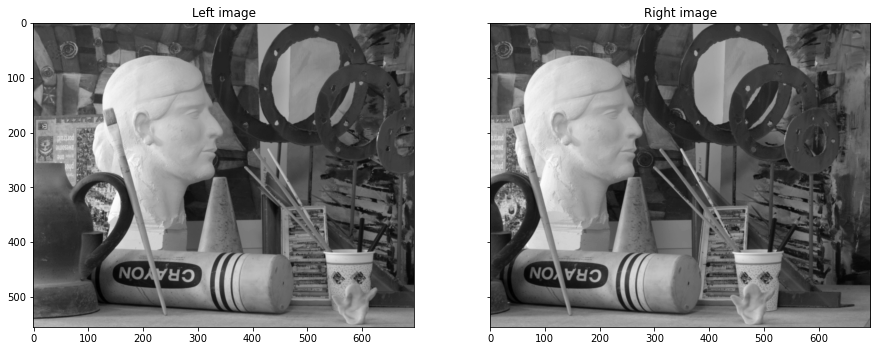

In [13]:
#First plot I1,I5 :
imL = cv2.imread('view1.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('view5.tif', cv2.IMREAD_GRAYSCALE)
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(15,15));
ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image');
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image');

## Disparity maps

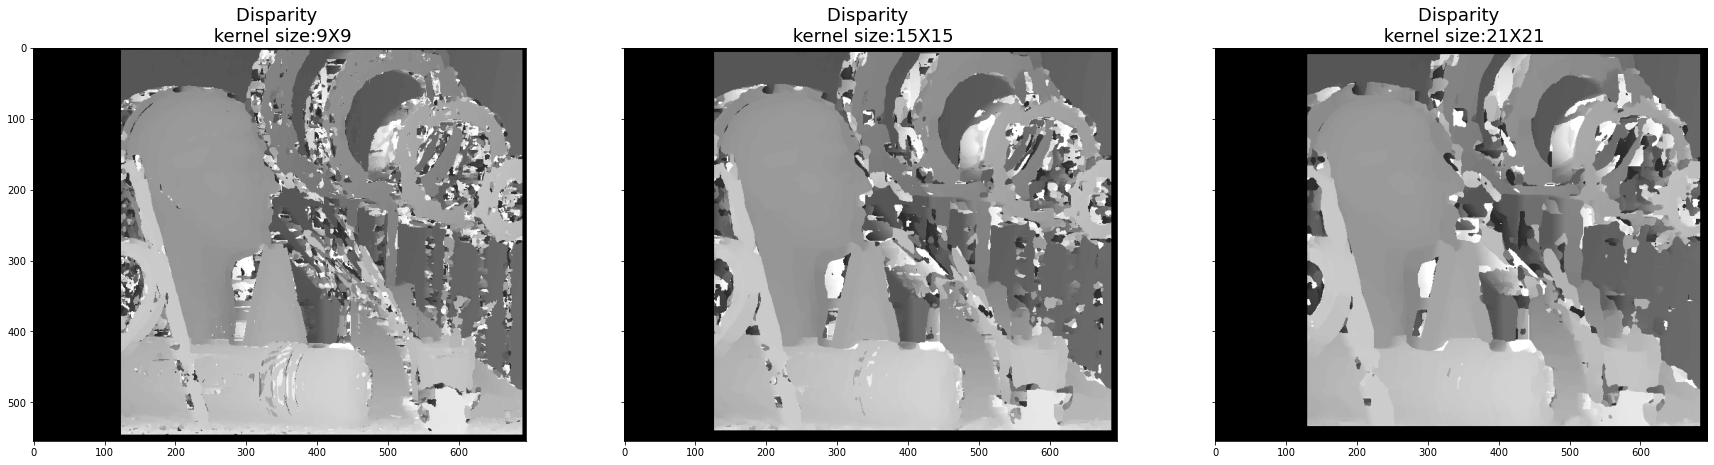

In [14]:
plot_func(w_9,w_15,w_21,'Disparity')

## Reconstructed Right image with different patches

plotting the differences between the different window patches reconstructed images:

karnel size 9X9 score:25157408

karnel size 15X15 score:25760100

karnel size 21X21 score:26456386

 


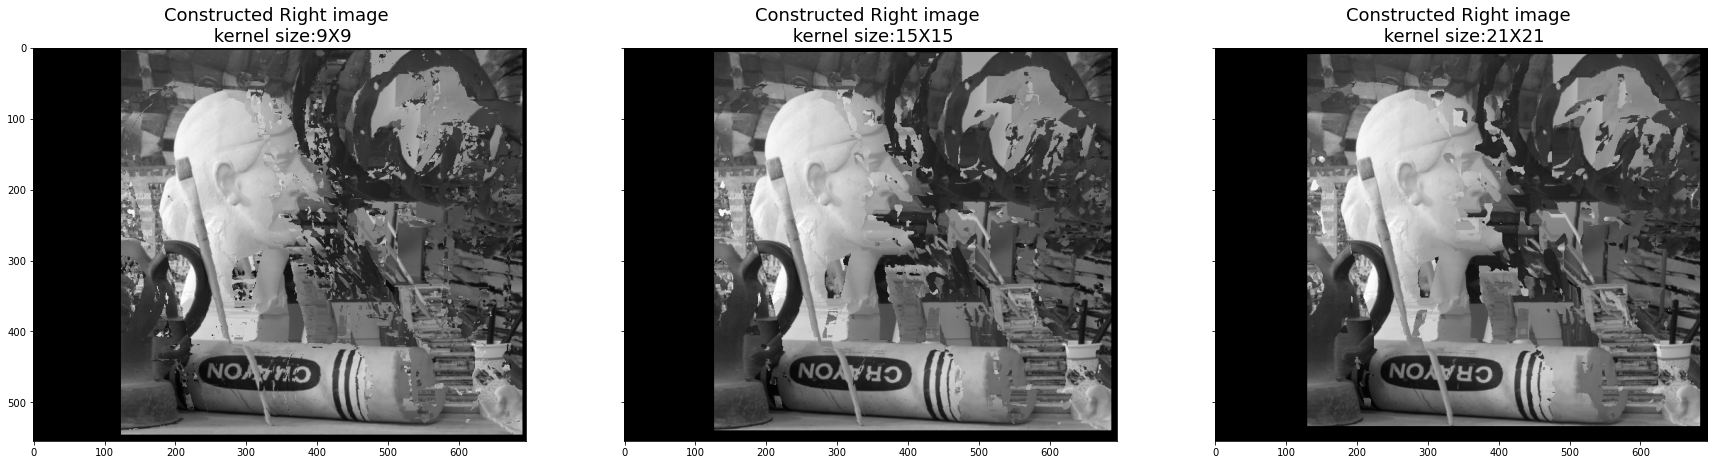

In [15]:
const_9,sum_of_diff_9 = reconstruct(imL,imR,w_9)
const_15,sum_of_diff_15 = reconstruct(imL,imR,w_15)
const_21,sum_of_diff_21 = reconstruct(imL,imR,w_21)
plot_func(const_9,const_15,const_21,'Constructed Right image')
print(f"karnel size 9X9 score:{sum_of_diff_9}\n\nkarnel size 15X15 score:{sum_of_diff_15}\n\nkarnel size 21X21 score:{sum_of_diff_21}\n\n ")

## Depth matrix:

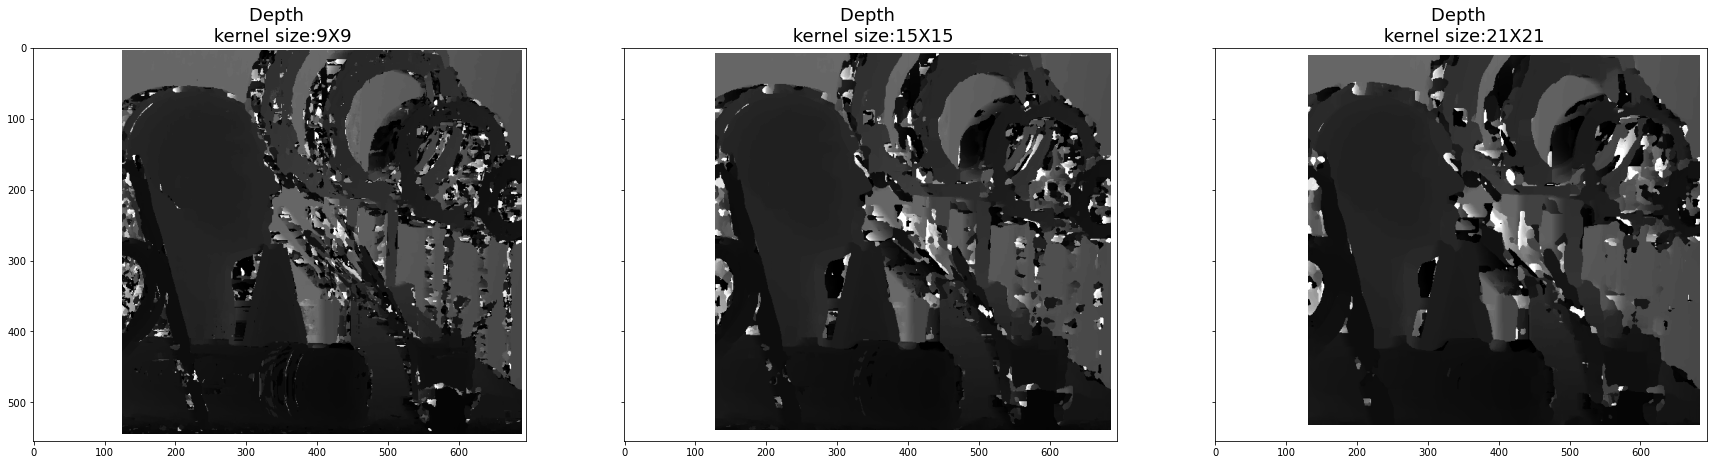

In [16]:
plot_func(z_9,z_15,z_21,'Depth')

# 3D model Scatter plots

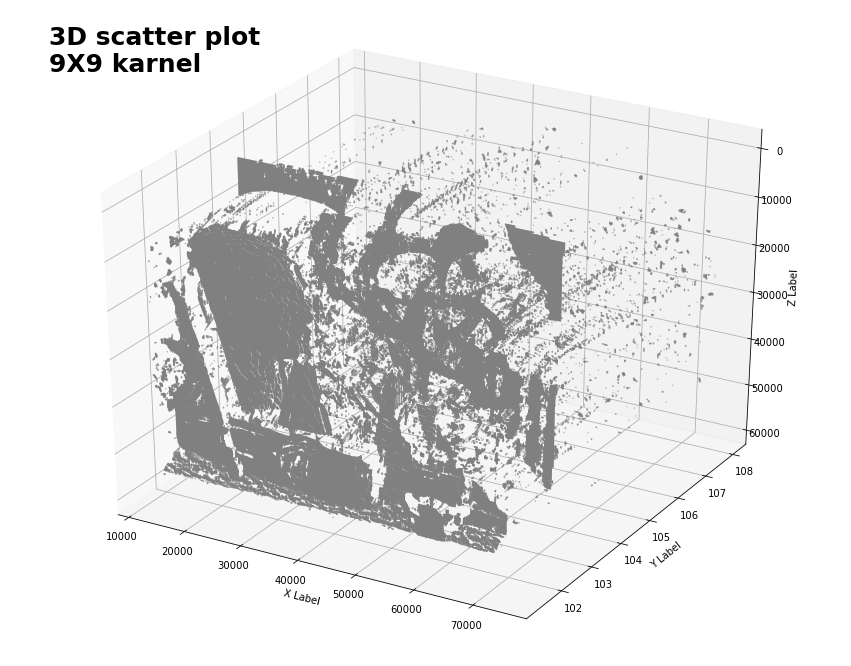

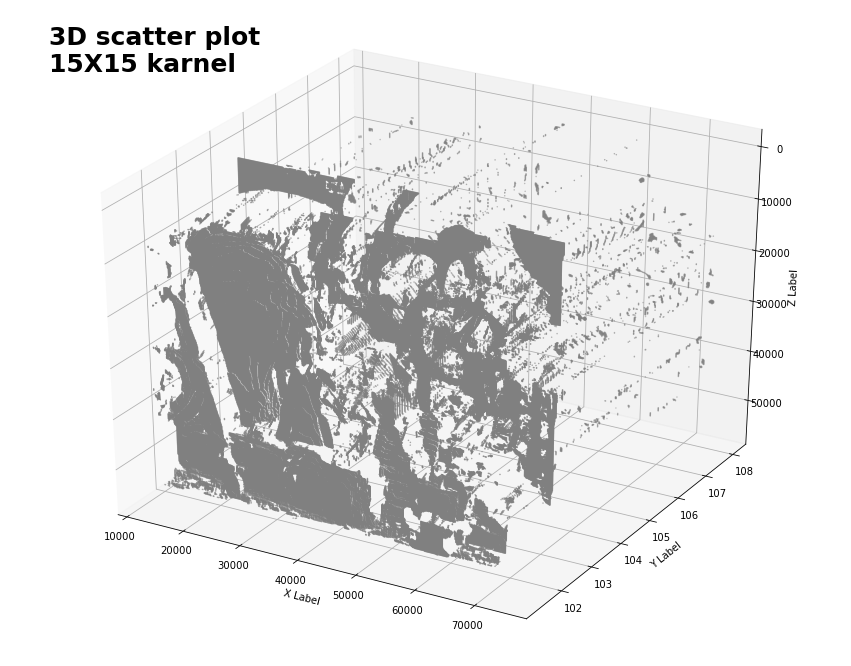

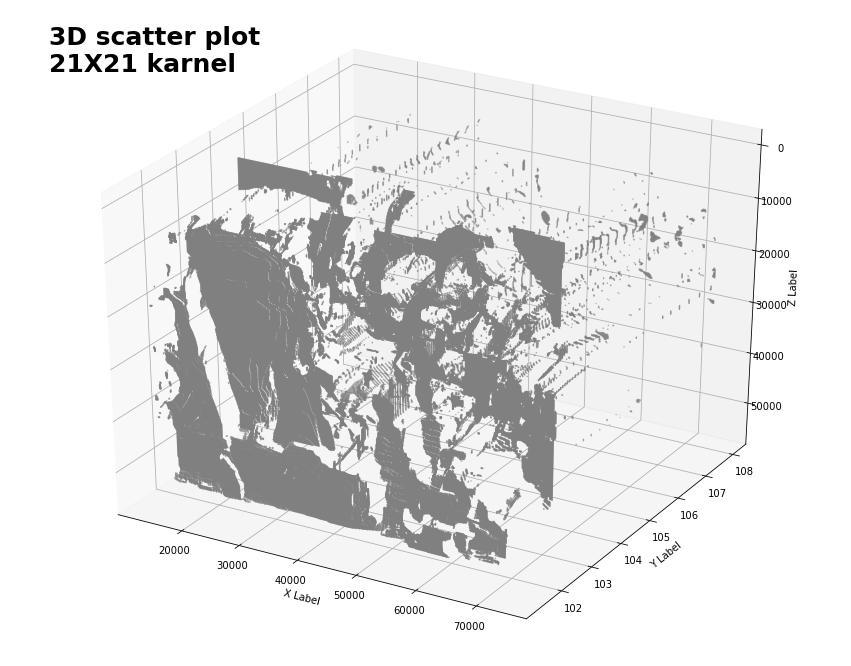

In [17]:
plotter_3d(x_9,y_9,z_9,9)
plotter_3d(x_15,y_15,z_15,15)
plotter_3d(x_21,y_21,z_21,21)

## Part D2 

Repeat D1 with using the values of the gradients of the images instead of the intensities for computing the descriptors v_1 and v_2.

**Answer Questions:**
1. What are the differences in the results of D1 and D2? 
2. How does the patch size affect the results? 
3. How does the  order preserving assumption affect the results?
4. Which regions have more errors? Why?

BONUS: repeat D1 but use dynamic programing to compute an optimal order preserving disparity.




**Our Answers :**

answers at the PDF


In [20]:
from scipy.signal import convolve2d
def sobel(img):
    ixx = np.flip(np.array([[1, 2, 1]]).T @ np.array([[1, 0, -1]]))
    iyy=  np.flip(np.array([[1, 0, -1]]).T @ np.array([[1, 2, 1]]))
    I_x = convolve2d(img, ixx, mode='same')
    I_y = convolve2d(img, iyy, mode='same')
    G_xy = np.sqrt(np.square(I_x) + np.square(I_y))
    G_xy *= 255.0 / G_xy.max()
    return G_xy

In [30]:
imL = cv2.imread('view1.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('view5.tif', cv2.IMREAD_GRAYSCALE)
iml_sobel = sobel(imL)
imr_sobel = sobel(imR)

(<matplotlib.image.AxesImage at 0x1c9604d70d0>, Text(0.5, 1.0, 'Right image'))

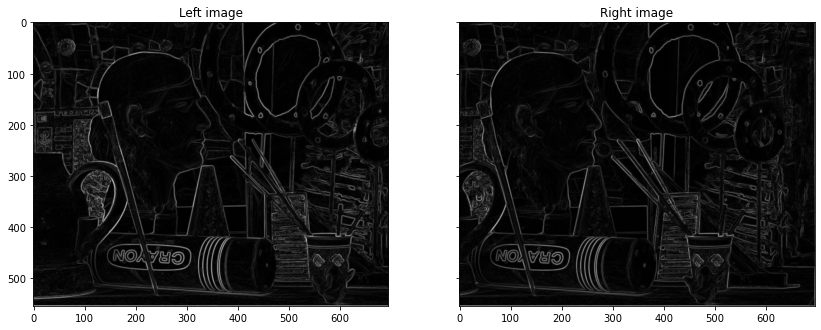

In [22]:
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')
ax1.imshow(iml_sobel, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imr_sobel, cmap='gray'), ax2.set_title('Right image')

# Save and load the matrices

In [24]:
wg_9,xg_9,yg_9,zg_9 = stereo_main(iml_sobel,imr_sobel,9)
np.save("wg_9.npy",wg_9); np.save("xg_9.npy",xg_9); np.save("yg_9.npy",yg_9); np.save("zg_9.npy",zg_9)

wg_15,xg_15,yg_15,zg_15 = stereo_main(iml_sobel,imr_sobel,15)
np.save("wg_15.npy",wg_15); np.save("xg_15.npy",xg_15); np.save("yg_15.npy",yg_15); np.save("zg_15.npy",zg_15)

wg_21,xg_21,yg_21,zg_21 = stereo_main(iml_sobel,imr_sobel,21)
np.save("wg_21.npy",wg_21); np.save("xg_21.npy",xg_21); np.save("yg_21.npy",yg_21); np.save("zg_21.npy",zg_21)

In [25]:
#loading the outputs:
wg_9= np.load('wg_9.npy') ;xg_9=np.load('xg_9.npy') ;yg_9= np.load('yg_9.npy');zg_9 = np.load('zg_9.npy');
wg_15= np.load('wg_15.npy');xg_15= np.load('xg_15.npy');yg_15=np.load('yg_15.npy') ;zg_15 = np.load('zg_15.npy');
wg_21= np.load('wg_21.npy');xg_21=np.load('xg_21.npy') ;yg_21=np.load('yg_21.npy') ;zg_21= np.load('zg_21.npy')

## Plotting the disparity maps

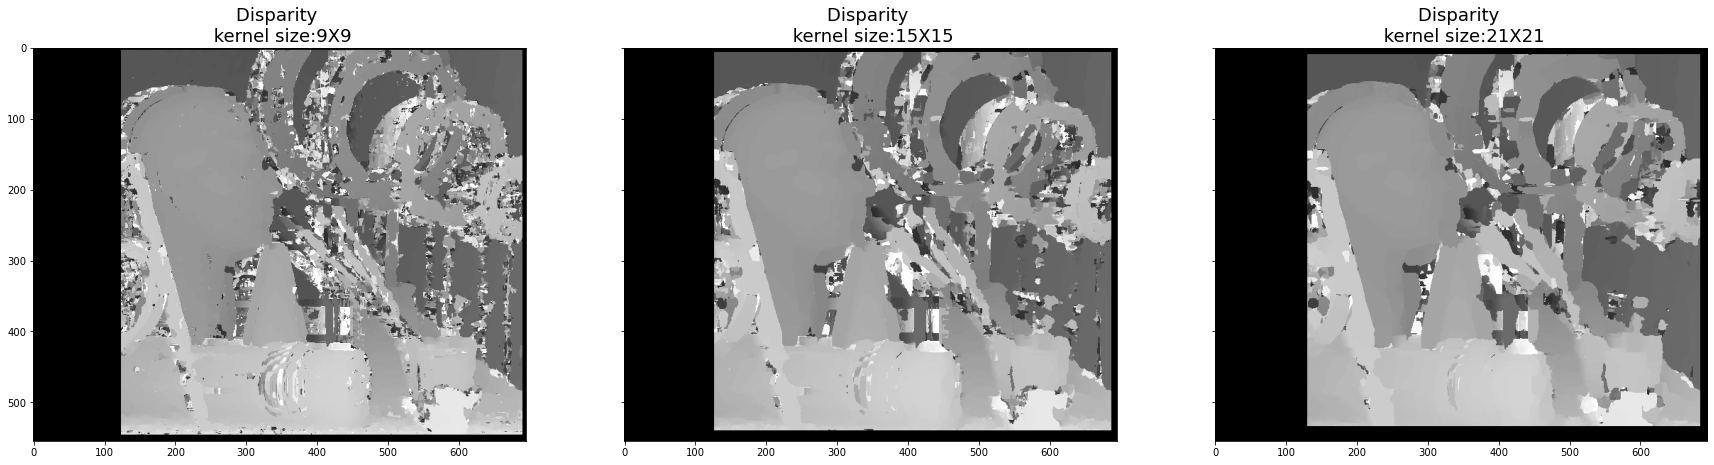

In [26]:
plot_func(wg_9,wg_15,wg_21,'Disparity')

## Reconstructed Right image with different patches

karnel size 9X9 score:25171092

karnel size 15X15 score:25856246

karnel size 21X21 score:26522640

 


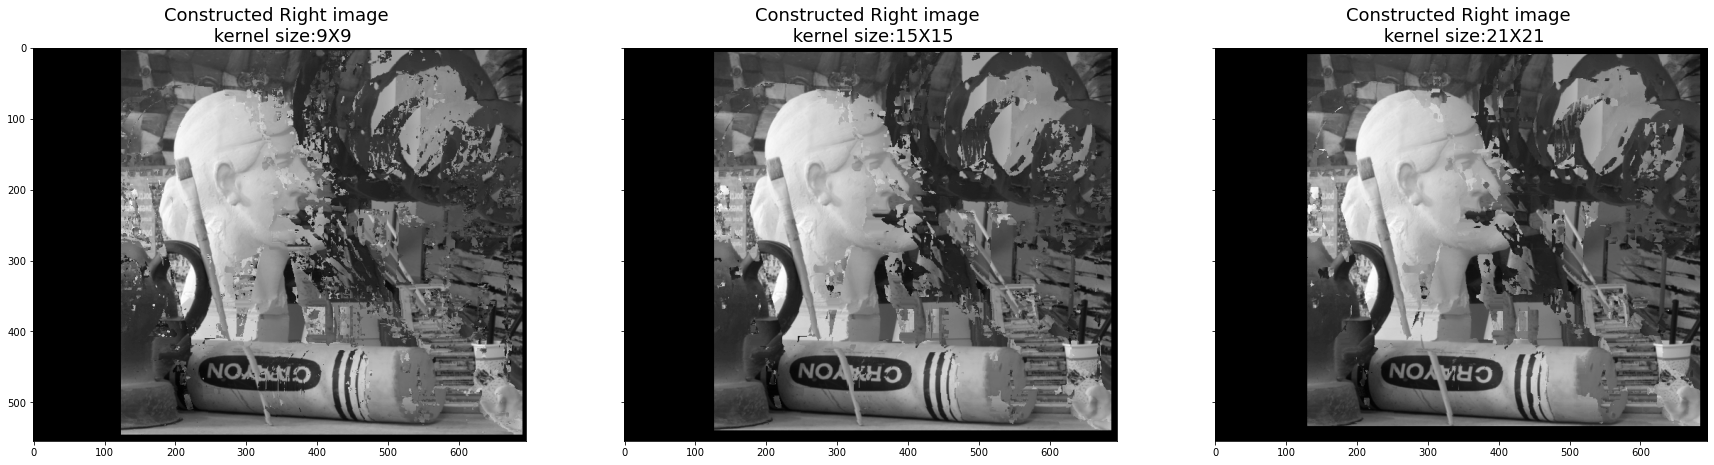

In [32]:
const_9,sum_of_diff_9 = reconstruct(imL,imR,wg_9)
const_15,sum_of_diff_15 = reconstruct(imL,imR,wg_15)
const_21,sum_of_diff_21 = reconstruct(imL,imR,wg_21)
plot_func(const_9,const_15,const_21,'Constructed Right image')
print(f"karnel size 9X9 score:{sum_of_diff_9}\n\nkarnel size 15X15 score:{sum_of_diff_15}\n\nkarnel size 21X21 score:{sum_of_diff_21}\n\n ")

# Depth matrix:

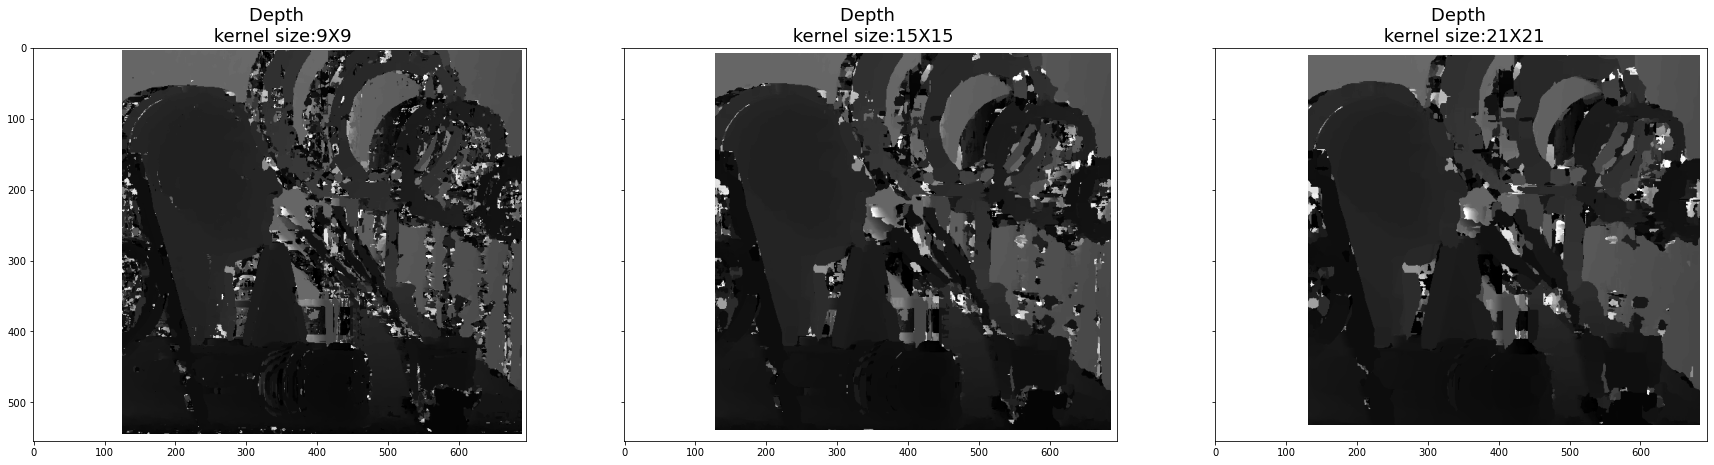

In [33]:
plot_func(zg_9,zg_15,zg_21,'Depth')

# 3D model Scatter plots

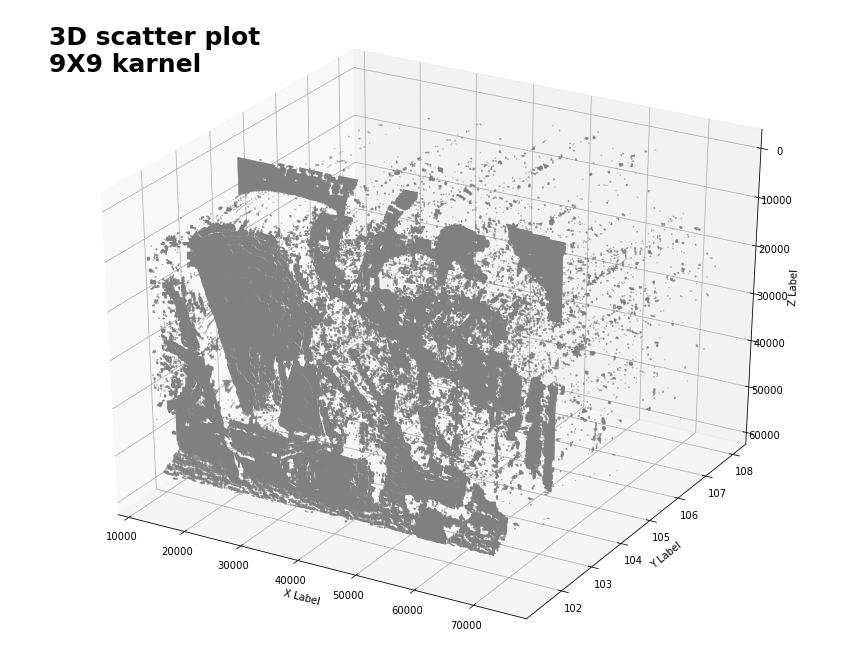

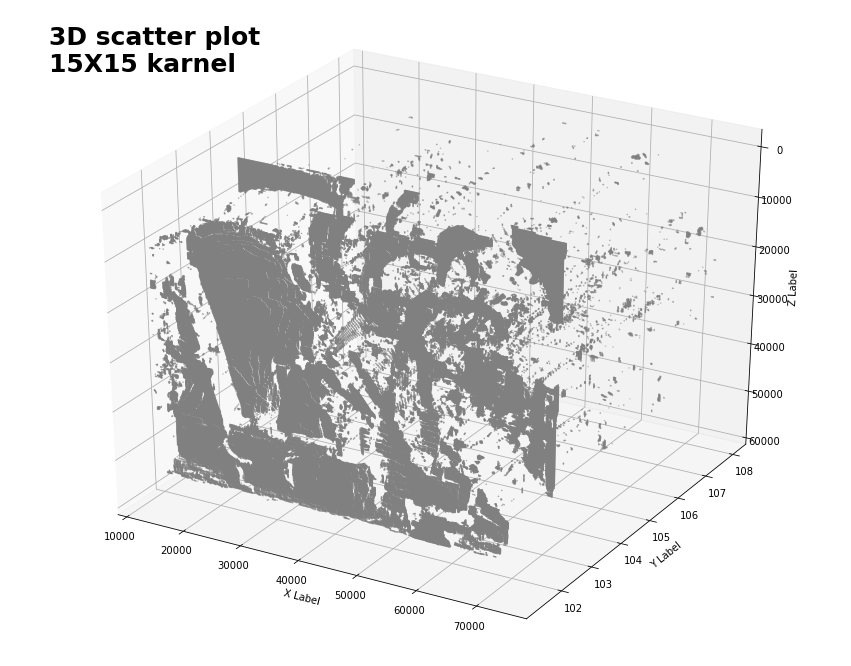

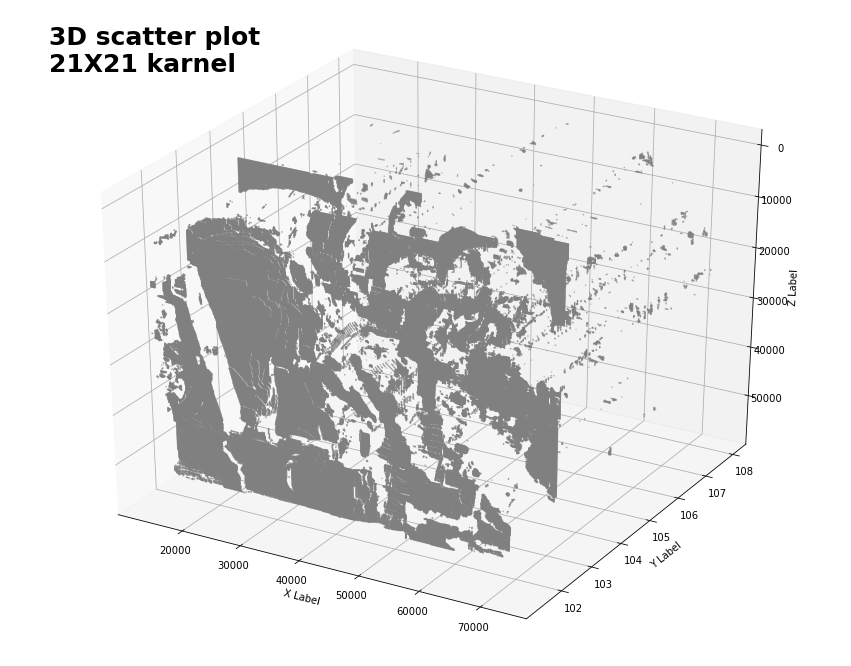

In [34]:
plotter_3d(xg_9,yg_9,zg_9,9)
plotter_3d(xg_15,yg_15,zg_15,15)
plotter_3d(xg_21,yg_21,zg_21,21)

##  Part E ##

### Theoretical questions: ###
1. Suggest a method to remove outliers when you have three general images of the same scene.
2. Compare the following two methods to remove outliers: (a) Use  RANSAC with  the homography model (we will learn it in class 6); (ii) Use  RANSAC with the epipolar geometry (fundamental matrix) model. When do you expect (i) to give better results, and when do you expect (ii)  to give better results? Explain your answer.
3. Why is C=nullspace(M)? Go over the proof in Class 4 slides 52-55. It is nice!\
   Answer:
   a. Why is the degree of M  at most 3?
   b. Let A and B be two 3D points such that B is not on the 3D line that connects A and the center of projection COP.\
      Is it possible that MA=MB? Give a short explanation for your answer.
   c. Why is 𝑀(1−𝜆)C=0  (where C is in homogenous coordinates)?



**Our Answers :**

answers at the PDF
